In [2]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.f_on_f import FunctionOnFunctionModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../utilities"))
from utilities.plotting.plot_fun import subplot_results, subplot_b_spline_results

### Settings

In [3]:
N = 4 # runs
Kx_family = 'step'
Kx = [[6]]
Kb = [[2]] # Polynomial
Ky = 2
epochs = 100
refinement_epochs = 100
lvls = [-1, 0, 1]
Sigma_decay = 0
f_on_f_model = FunctionOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, Ky=Ky, Sigma_decay=Sigma_decay)

### J matrix

In [32]:
f_on_f_model.J_cb

array([[1.        , 0.        , 0.        ],
       [0.        , 0.16666667, 0.01388889],
       [0.        , 0.16666667, 0.04166667],
       [0.        , 0.16666667, 0.06944444],
       [0.        , 0.16666667, 0.09722222],
       [0.        , 0.16666667, 0.125     ],
       [0.        , 0.16666667, 0.15277778]])

### Sigma matrix

In [33]:
f_on_f_model.Sigma

array([[1., 0.],
       [0., 1.]])

### Optimize design

In [34]:
optimizer_f_on_f = CordexDiscrete(model=f_on_f_model, runs=N, levels=lvls)
best_design_f_on_f, best_objective_value_f_on_f = optimizer_f_on_f.fit(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 339.35it/s]


Best objective value (A): 17.5


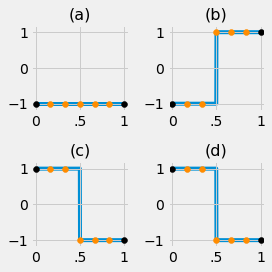

In [35]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_f_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_f_on_f,2)}')

## B-spline for X

### Extra Settings needed for B-spline

In [38]:
k_degree = 2
Kx_family = 'b-spline'

In [39]:
f_on_f_model = FunctionOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, Ky=Ky, Sigma_decay=Sigma_decay, k_degree=k_degree)
f_on_f_model.get_Jcb()

TypeError: 'int' object is not subscriptable

In [40]:
optimizer_f_on_f = CordexDiscrete(model=f_on_f_model, runs=N, levels=lvls)
best_design_f_on_f, best_objective_value_f_on_f = optimizer_f_on_f.fit(epochs=epochs)

100%|██████████| 100/100 [00:02<00:00, 35.72it/s]


In [41]:
f_on_f_model.knots_num

17

In [42]:
best_design_f_on_f

array([[ 0.03570236,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -0.5       ,  1.        ,  1.        ,
         1.        ],
       [-0.93189537, -1.        , -1.        , -1.        , -1.        ,
        -1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        , -1.        , -1.        ,
        -1.        ],
       [ 0.84323955, -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        , -1.        , -1.        ,
        -1.        ],
       [-0.11705322,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ,  1.        ,  1.        ,
         1.        ],
       [-0.2852257 , -1.        , -1

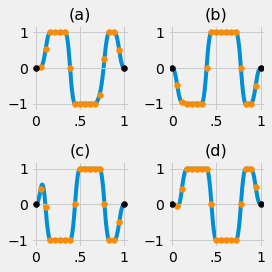

Best objective value (A): 177.76


In [43]:
subplot_b_spline_results(2, 2, np.linspace(0,1,1000), best_design_f_on_f, k_degree)
print(f'Best objective value (A): {np.round(best_objective_value_f_on_f,2)}')

### Continuous

In [44]:
optimizer_f_on_f = CordexContinuous(model=f_on_f_model, runs=N)
best_design_f_on_f, best_objective_value_f_on_f = optimizer_f_on_f.fit(epochs=epochs)

100%|██████████| 100/100 [00:04<00:00, 21.43it/s]


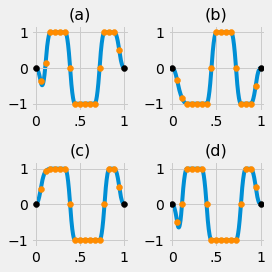

Best objective value (A): 170.52


In [45]:
subplot_b_spline_results(2, 2, np.linspace(0,1,1000), best_design_f_on_f, k_degree)
print(f'Best objective value (A): {np.round(best_objective_value_f_on_f,2)}')

### Loop

100%|██████████| 100/100 [00:03<00:00, 26.23it/s]


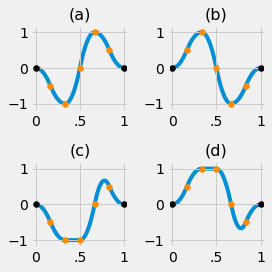

100%|██████████| 100/100 [00:03<00:00, 28.98it/s]


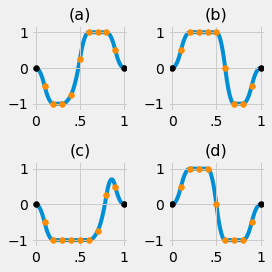

100%|██████████| 100/100 [00:03<00:00, 27.28it/s]


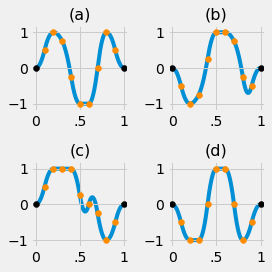

100%|██████████| 100/100 [00:06<00:00, 15.58it/s]


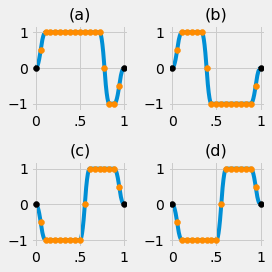

100%|██████████| 100/100 [00:05<00:00, 17.15it/s]


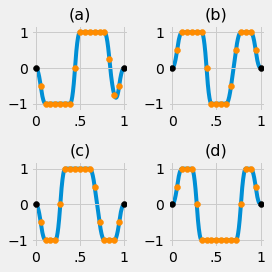

100%|██████████| 100/100 [00:04<00:00, 24.67it/s]


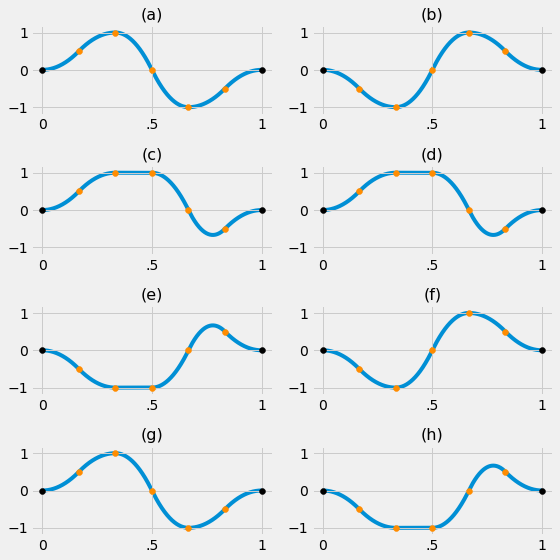

100%|██████████| 100/100 [00:03<00:00, 29.54it/s]


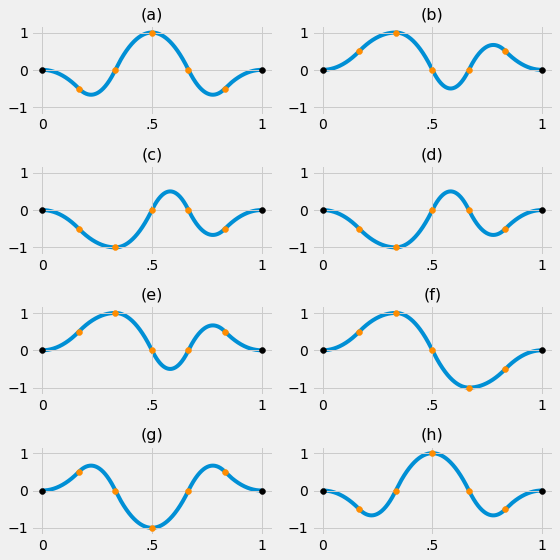

100%|██████████| 100/100 [00:06<00:00, 15.02it/s]


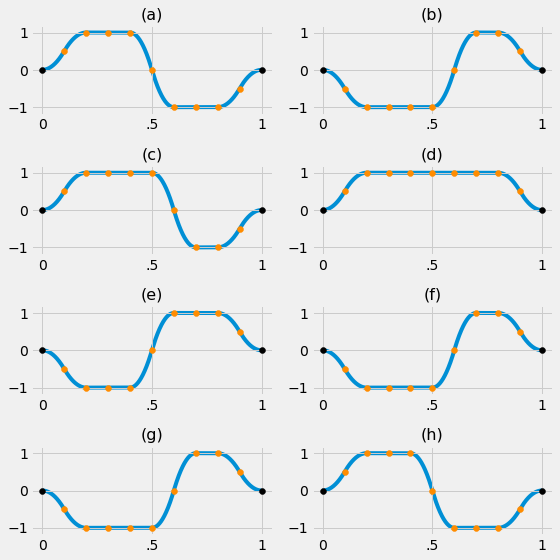

100%|██████████| 100/100 [00:06<00:00, 15.54it/s]


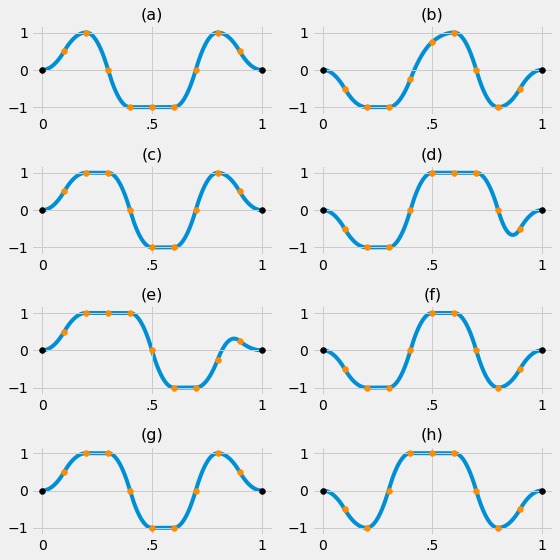

100%|██████████| 100/100 [00:13<00:00,  7.62it/s]


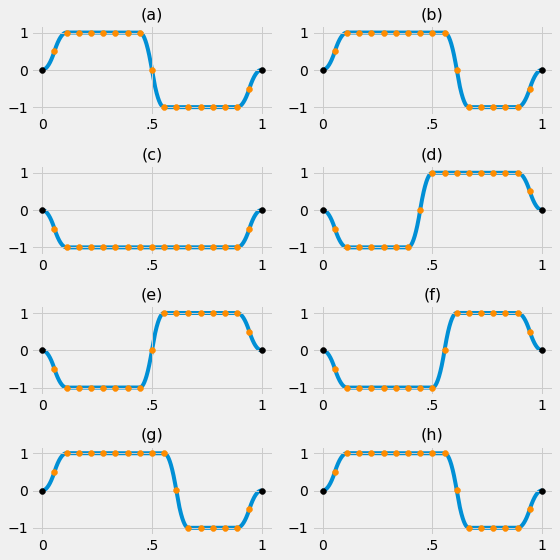

100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


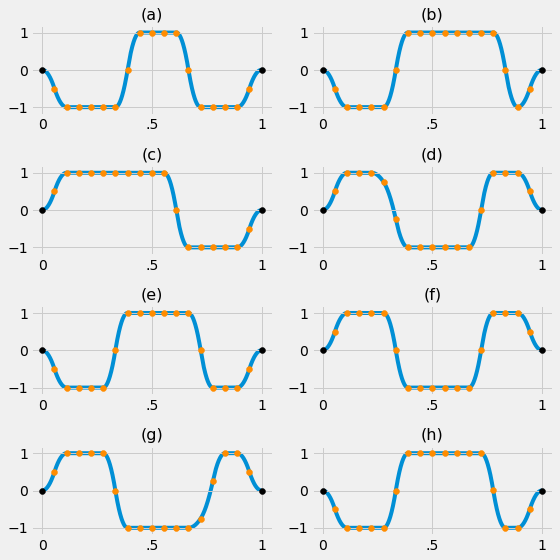

100%|██████████| 100/100 [00:04<00:00, 20.40it/s]


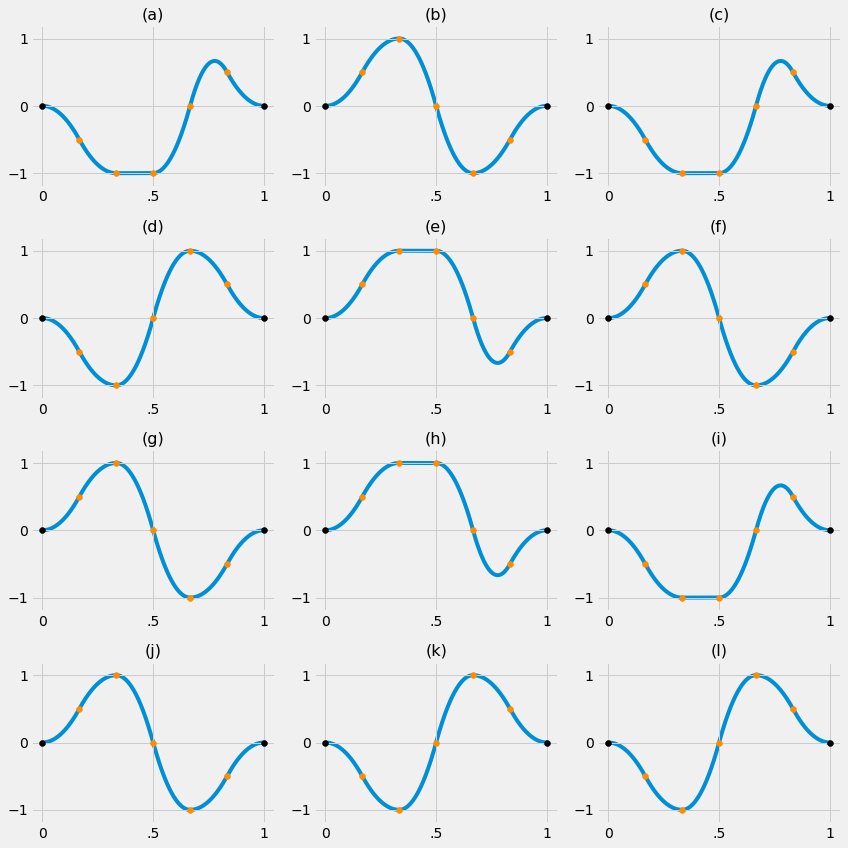

100%|██████████| 100/100 [00:04<00:00, 21.12it/s]


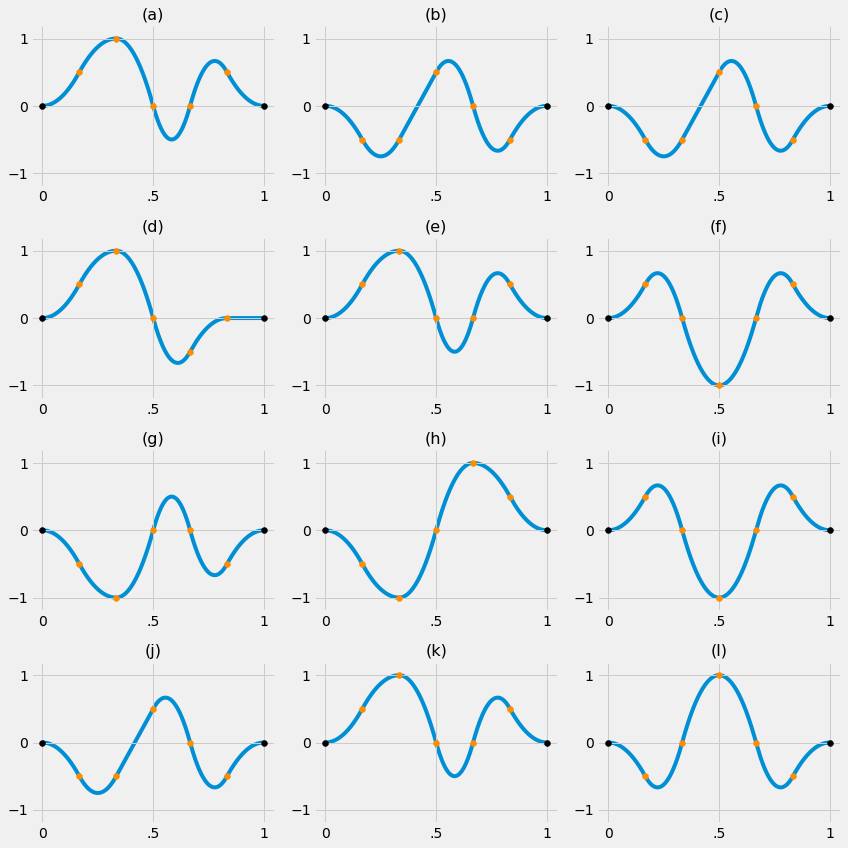

100%|██████████| 100/100 [00:29<00:00,  3.44it/s]


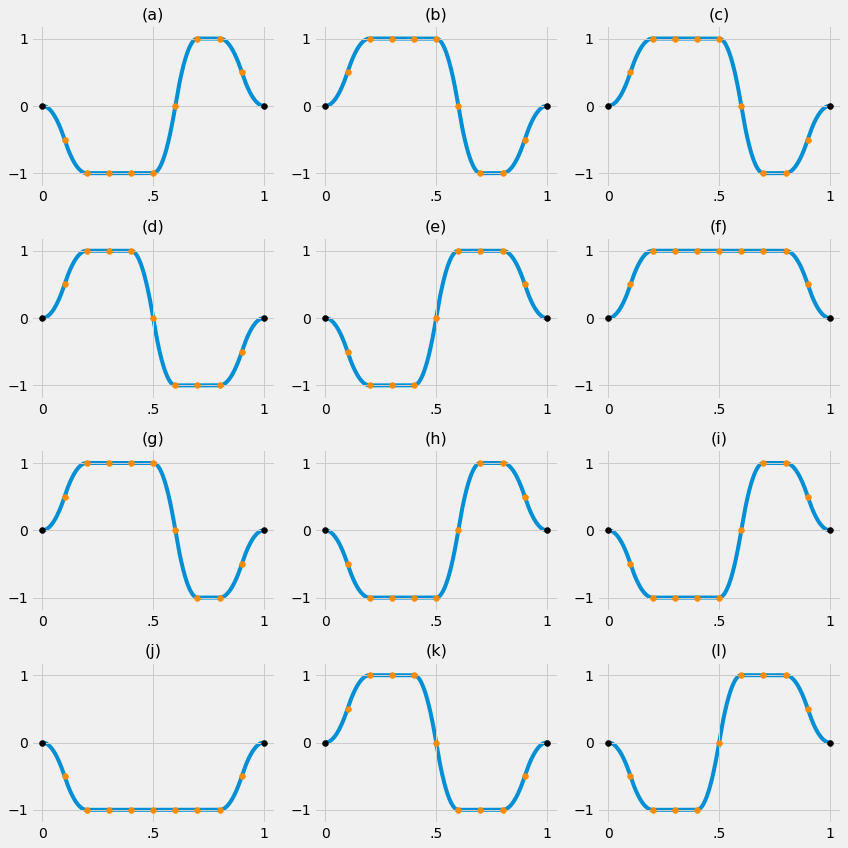

100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


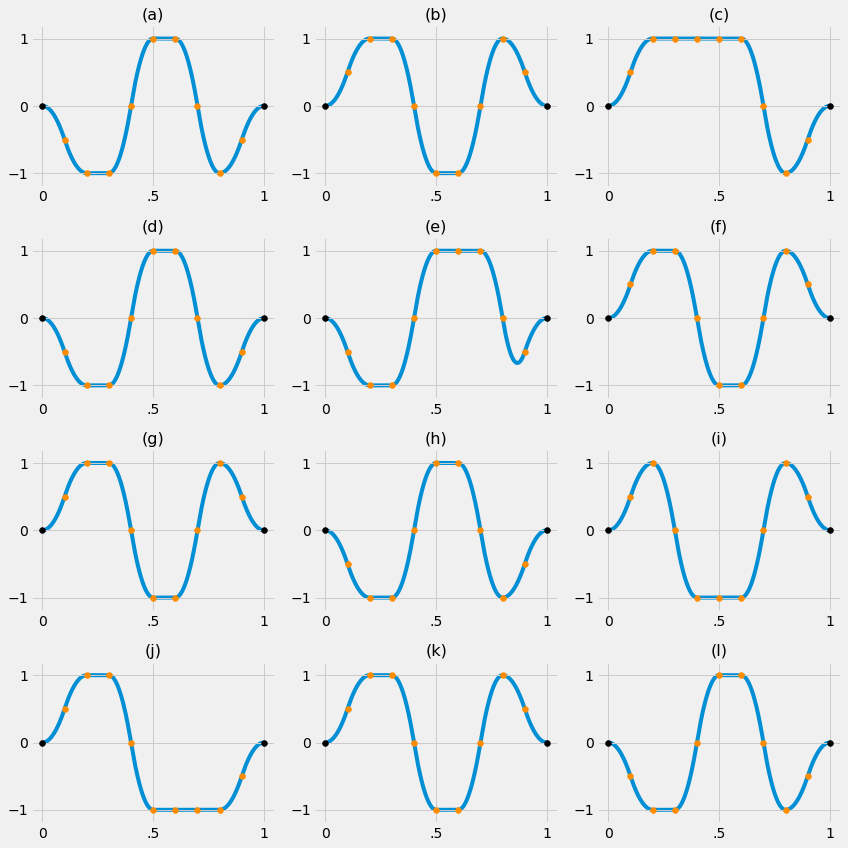

100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


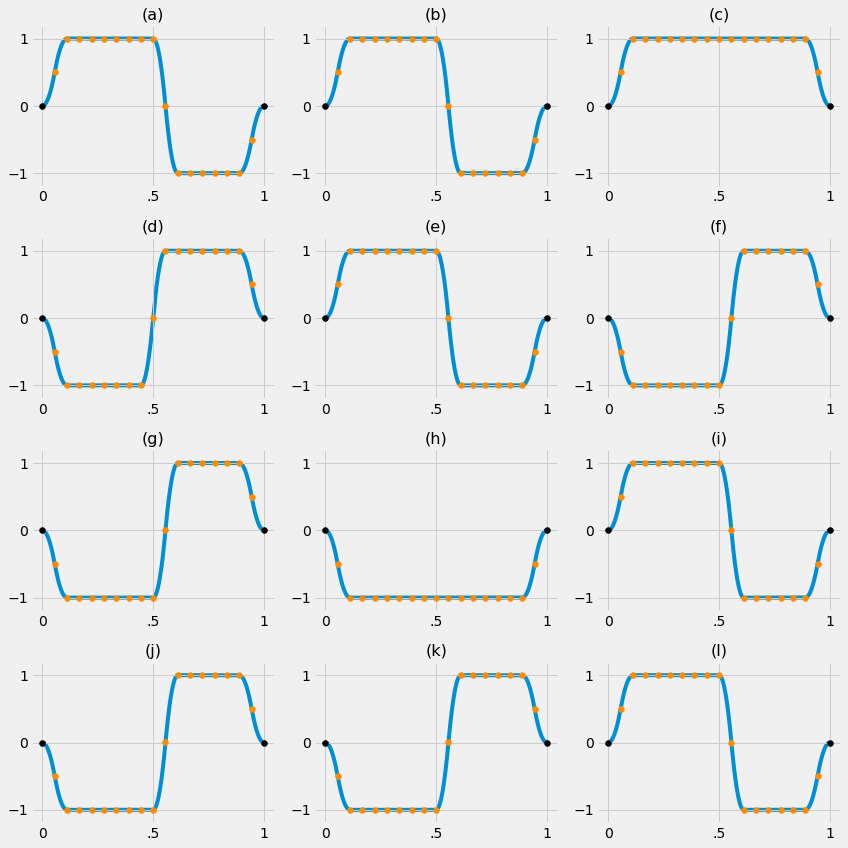

100%|██████████| 100/100 [00:26<00:00,  3.81it/s]


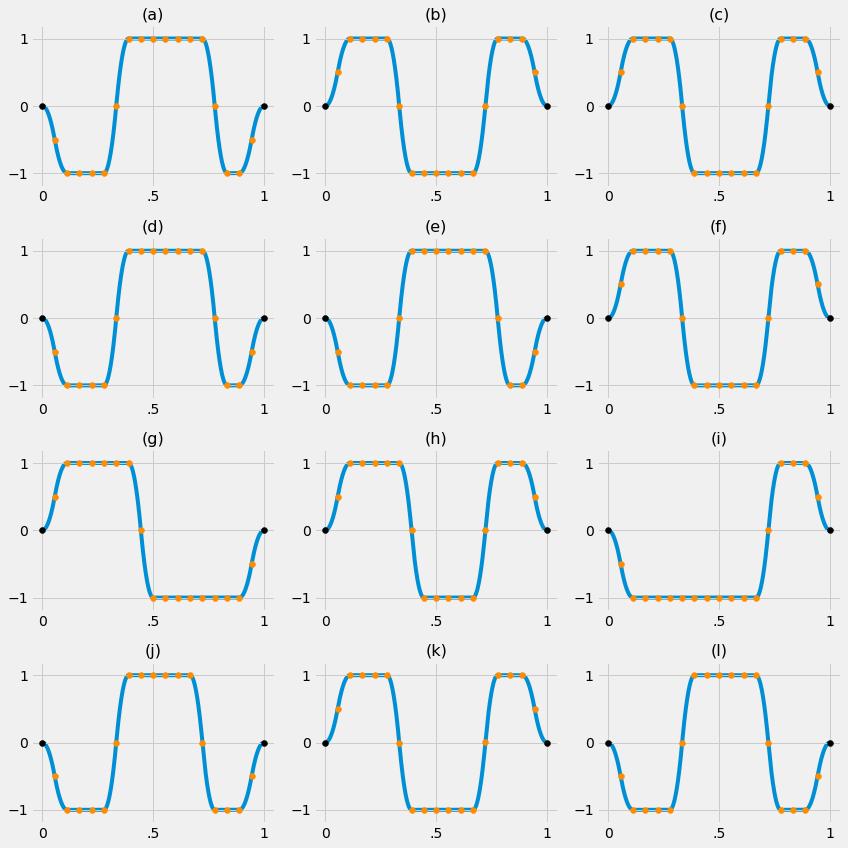

In [6]:
N_s = [4, 8, 12]
Kx_s = [[2], [4], [8], [16]]
Kb_s = [[2], [3]]
lvls = [-1, -.5, 0, .5, 1]

k_degrees = 2
Kx_family = 'b-spline'

for N in N_s:
    for Kx in Kx_s:
        for Kb in Kb_s:
            f_on_f_model = FunctionOnFunctionModel(Kx=Kx, Kb= Kb, Kx_family=Kx_family, Ky=Ky, Sigma_decay=Sigma_decay, k_degree=k_degrees)
            try:
                optimizer_f_on_f = CordexDiscrete(model=f_on_f_model, runs=N, levels=lvls)
                best_design_f_on_f, best_objective_value_f_on_f = optimizer_f_on_f.fit(epochs=epochs)
                if N == 4:
                    sub_x = 2
                    sub_y = 2
                elif N == 8:
                    sub_x = 4
                    sub_y = 2
                elif N == 12:
                    sub_x = 4
                    sub_y = 3
                else:
                    sub_x = 0
                    sub_y = 0

                design_graph = subplot_b_spline_results(sub_x, sub_y, np.linspace(0,1,1000), best_design_f_on_f, k_degrees, graph_title=f'./N-{N}_Kx-{Kx}_Kb-{Kb}_K-{k_degrees}.png')
            except:
                pass